# Binary class classification

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('/Users/pawankumarkc/Documents/vscodepython/MLAlgo/datasets/titanic_train.csv')

In [3]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.isnull().sum()/len(dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], inplace=True, axis=1)

In [6]:
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
#Handling missing data
dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

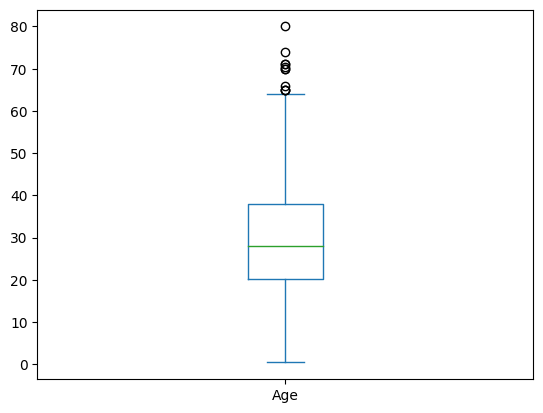

In [8]:
dataset['Age'].plot(kind='box')

In [9]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [10]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')      #Same as mode, S is most repeated value

In [12]:
dataset.isnull().count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Embarked    891
dtype: int64

## Encoding

In [13]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
dataset['Sex'] = dataset['Sex'].astype('category').cat.codes

In [16]:
dataset = pd.get_dummies(dataset, columns=['Embarked'])

In [17]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


In [18]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
#dummy variable again
dataset = pd.get_dummies(dataset, columns=['Pclass'])

In [20]:
dataset.head(5)

,Survived,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1,0,0,1
1,1,0,38.0,1,0,1,0,0,1,0,0
2,1,0,26.0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,0,0,1,1,0,0
4,0,1,35.0,0,0,0,0,1,0,0,1


In [21]:
dataset.drop(columns=['Embarked_C','Pclass_1'], inplace=True, axis=1)

In [22]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


In [23]:
## Outlier treatment not required in logistic regression. Age is only value (max age 80, is real and possible) and other columns are categorical
## Feature scaling can be done only on age, now required as of now. If results are not good then we can redo this step.

## Imbalance check - Mandate in logistic regression
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [30]:
549/(549+342)

0.6161616161616161

In [28]:
# Split the data
x = dataset.iloc[:,1:]
y = dataset[['Survived']]

In [29]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101, stratify=y)

#stratify will consider dependent variable(y) also for training, when survided 0 is 61% and not survivded is 39%, chances are less not survivded data is picked

In [32]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

#General logistic model

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

# Evaluation

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
print('Accuracy score = ',accuracy_score(y_train, y_pred_train))
print('Accuracy score = ',accuracy_score(y_test, y_pred_test))

#Both values are above 70

Accuracy score =  0.8173652694610778
Accuracy score =  0.7488789237668162


In [36]:
y_pred_test

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0])

In [37]:
y_test

,Survived
374,0
413,0
83,0
85,1
345,1
...,...
740,1
175,0
689,1
151,1


# Multi class classification problem (One vs rest / One vs All) OVR-OVS

In [39]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

#This is same as ascategory().cat.codes

In [41]:
df['species'].value_counts()

#This is a muti class classification

0    50
1    50
2    50
Name: species, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [43]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [44]:
# Splitting data

x = df.iloc[:,0:-1]
y = df['species']

In [45]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [47]:
# Split data into train, test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

## Building logistic regression with multi class classification


In [48]:
from sklearn.linear_model import LogisticRegression

logit_ovr = LogisticRegression(multi_class='ovr')
logit_ovr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [49]:
y_pred_train = logit_ovr.predict(x_train)
y_pred_test = logit_ovr.predict(x_test)

In [51]:
print('Training Accuracy score = ',accuracy_score(y_train, y_pred_train))
print('Test Accuracy score = ',accuracy_score(y_test, y_pred_test))

Training Accuracy score =  0.9553571428571429
Test Accuracy score =  0.8947368421052632


In [57]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.88      0.92        34
           2       0.91      0.98      0.94        41

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.95       112
weighted avg       0.96      0.96      0.96       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.75      0.86        16
           2       0.69      1.00      0.82         9

    accuracy                           0.89        38
   macro avg       0.90      0.92      0.89        38
weighted avg       0.93      0.89      0.90        38



In [60]:
print(confusion_matrix(y_train, y_pred_train))

print(confusion_matrix(y_test, y_pred_test))

[[37  0  0]
 [ 0 30  4]
 [ 0  1 40]]
[[13  0  0]
 [ 0 12  4]
 [ 0  0  9]]


ValueError: Filler values must be provided when X has more than 2 training features.

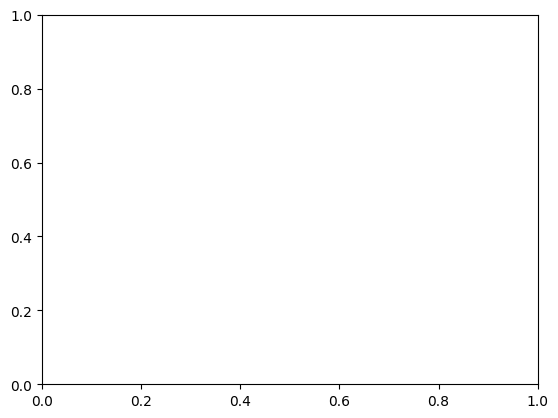

In [56]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision = plot_decision_regions(x.values, y.values, logit_ovr, legend=2)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Logistic regression with OVR/OVA model')
plt.show()